In [60]:
# %matplotlib widget
# %matplotlib notebook
from itertools import product, combinations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
from scipy.signal import correlate, correlation_lags
from scipy.signal import find_peaks, peak_prominences
from lmfit import Model, minimize

from pysmog.data_loading import load_defra_file
from pysmog.data_processing import bin_data
from pysmog.plot_utils import set_matplotlib_defaults
from pysmog.psd import lorentzian, log_lorentzian

In [61]:
set_matplotlib_defaults()

In [62]:
data_tower_hamlets = '../data/2022-01-01-230802122803.csv'
data_tower_soton = '../data/2022-01-01-230802132242.csv'

df  = load_defra_file(data_tower_hamlets)
df2 = load_defra_file(data_tower_soton)

In [63]:
df.head(7).style.background_gradient(cmap='coolwarm')

,End Date,End Time,M_DIR,Status/units,M_SPED,Status/units.1,M_T,Status/units.2,NO,Status/units.3,NO2,Status/units.4,NOXasNO2,Status/units.5,DateTime,t
0,01/01/2022,01:00:00,213.000000,P deg,2.900000,P ms-1,10.400000,P degC,0.873110,R ugm-3,10.327500,R ugm-3,11.666250,R ugm-3,2022-01-01 01:00:00,0.000000
1,01/01/2022,02:00:00,217.400000,P deg,3.500000,P ms-1,10.400000,P degC,1.870950,R ugm-3,8.032500,R ugm-3,11.092500,R ugm-3,2022-01-01 02:00:00,3600.000000
2,01/01/2022,03:00:00,218.800000,P deg,3.600000,P ms-1,10.500000,P degC,1.247300,R ugm-3,6.120000,R ugm-3,8.032500,R ugm-3,2022-01-01 03:00:00,7200.000000
3,01/01/2022,04:00:00,214.900000,P deg,3.900000,P ms-1,11.000000,P degC,0.997840,R ugm-3,4.398750,R ugm-3,6.120000,R ugm-3,2022-01-01 04:00:00,10800.000000
4,01/01/2022,05:00:00,211.000000,P deg,4.300000,P ms-1,11.900000,P degC,0.748380,R ugm-3,5.163750,R ugm-3,6.120000,R ugm-3,2022-01-01 05:00:00,14400.000000
5,01/01/2022,06:00:00,211.000000,P deg,4.600000,P ms-1,11.700000,P degC,0.374190,R ugm-3,3.442500,R ugm-3,4.016250,R ugm-3,2022-01-01 06:00:00,18000.000000
6,01/01/2022,07:00:00,207.600000,P deg,4.400000,P ms-1,11.100000,P degC,0.124730,R ugm-3,4.016250,R ugm-3,4.207500,R ugm-3,2022-01-01 07:00:00,21600.000000


In [64]:
df2.tail(7).style.background_gradient(cmap='coolwarm') # There can sometimes be NaNs in columns!

/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,End Date,End Time,PM10,Status/units,M_DIR,Status/units.1,M_SPED,Status/units.2,M_T,Status/units.3,NO,Status/units.4,NO2,Status/units.5,NOXasNO2,Status/units.6,O3,Status/units.7,PM25,Status/units.8,SO2,Status/units.9,DateTime,t
7241,29/10/2022,18:00:00,32.675000,R ugm-3 (FIDAS),222.900000,P deg,5.000000,P ms-1,16.400000,P degC,9.971900,R ugm-3,29.634550,R ugm-3,44.924590,R ugm-3,26.443030,R ugm-3,15.236000,R ugm-3 (Ref.eq),nan,nan,2022-10-29 18:00:00,26067600.000000
7242,29/10/2022,19:00:00,26.400000,R ugm-3 (FIDAS),225.000000,P deg,4.800000,P ms-1,15.900000,P degC,3.868700,R ugm-3,15.326580,R ugm-3,21.258500,R ugm-3,45.102820,R ugm-3,12.547000,R ugm-3 (Ref.eq),nan,nan,2022-10-29 19:00:00,26071200.000000
7243,29/10/2022,20:00:00,19.825000,R ugm-3 (FIDAS),221.200000,P deg,4.800000,P ms-1,15.600000,P degC,7.337190,R ugm-3,33.930520,R ugm-3,45.180720,R ugm-3,37.070130,R ugm-3,9.576000,R ugm-3 (Ref.eq),nan,nan,2022-10-29 20:00:00,26074800.000000
7244,29/10/2022,21:00:00,19.475000,R ugm-3 (FIDAS),226.700000,P deg,4.900000,P ms-1,15.200000,P degC,3.735300,R ugm-3,25.110260,R ugm-3,30.837630,R ugm-3,42.258950,R ugm-3,9.292000,R ugm-3 (Ref.eq),nan,nan,2022-10-29 21:00:00,26078400.000000
7245,29/10/2022,22:00:00,18.775000,R ugm-3 (FIDAS),227.400000,P deg,4.200000,P ms-1,14.700000,P degC,6.603470,R ugm-3,41.663600,R ugm-3,51.788780,R ugm-3,26.443030,R ugm-3,9.222000,R ugm-3 (Ref.eq),nan,nan,2022-10-29 22:00:00,26082000.000000
7246,29/10/2022,23:00:00,16.700000,R ugm-3 (FIDAS),222.000000,P deg,3.600000,P ms-1,14.100000,P degC,2.868170,R ugm-3,22.136900,R ugm-3,26.534710,R ugm-3,43.107120,R ugm-3,8.373000,R ugm-3 (Ref.eq),nan,nan,2022-10-29 23:00:00,26085600.000000
7247,29/10/2022,24:00:00,15.150000,R ugm-3 (FIDAS),209.400000,P deg,3.600000,P ms-1,13.800000,P degC,1.967700,R ugm-3,15.680140,R ugm-3,18.697240,R ugm-3,48.944540,R ugm-3,7.146000,R ugm-3 (Ref.eq),nan,nan,2022-10-30 00:00:00,26089200.000000


In [65]:
# Checking Correlated Values
corr = df.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,M_DIR,M_SPED,M_T,NO,NO2,NOXasNO2,t
M_DIR,1.00,0.13,-0.05,-0.01,-0.07,-0.03,-0.02
M_SPED,0.13,1.00,0.17,-0.30,-0.49,-0.40,-0.05
M_T,-0.05,0.17,1.00,-0.33,-0.42,-0.39,0.21
NO,-0.01,-0.30,-0.33,1.00,0.69,0.96,0.02
NO2,-0.07,-0.49,-0.42,0.69,1.00,0.86,-0.06
NOXasNO2,-0.03,-0.40,-0.39,0.96,0.86,1.00,-0.01
t,-0.02,-0.05,0.21,0.02,-0.06,-0.01,1.00


In [66]:
# Checking Correlated Values
corr = df2.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,PM10,M_DIR,M_SPED,M_T,NO,NO2,NOXasNO2,O3,PM25,SO2,t
PM10,1.00,-0.26,-0.05,-0.15,0.29,0.38,0.36,-0.06,0.94,0.27,-0.21
M_DIR,-0.26,1.00,0.13,-0.04,-0.05,-0.07,-0.06,-0.04,-0.27,-0.06,-0.06
M_SPED,-0.05,0.13,1.00,0.10,-0.22,-0.31,-0.28,0.35,-0.13,-0.12,-0.14
M_T,-0.15,-0.04,0.10,1.00,-0.25,-0.30,-0.30,0.38,-0.28,-0.10,0.63
NO,0.29,-0.05,-0.22,-0.25,1.00,0.55,0.95,-0.44,0.31,0.66,-0.15
NO2,0.38,-0.07,-0.31,-0.30,0.55,1.00,0.78,-0.54,0.38,0.39,-0.22
NOXasNO2,0.36,-0.06,-0.28,-0.30,0.95,0.78,1.00,-0.53,0.37,0.64,-0.19
O3,-0.06,-0.04,0.35,0.38,-0.44,-0.54,-0.53,1.00,-0.15,-0.18,-0.04
PM25,0.94,-0.27,-0.13,-0.28,0.31,0.38,0.37,-0.15,1.00,0.27,-0.28
SO2,0.27,-0.06,-0.12,-0.10,0.66,0.39,0.64,-0.18,0.27,1.00,-0.10


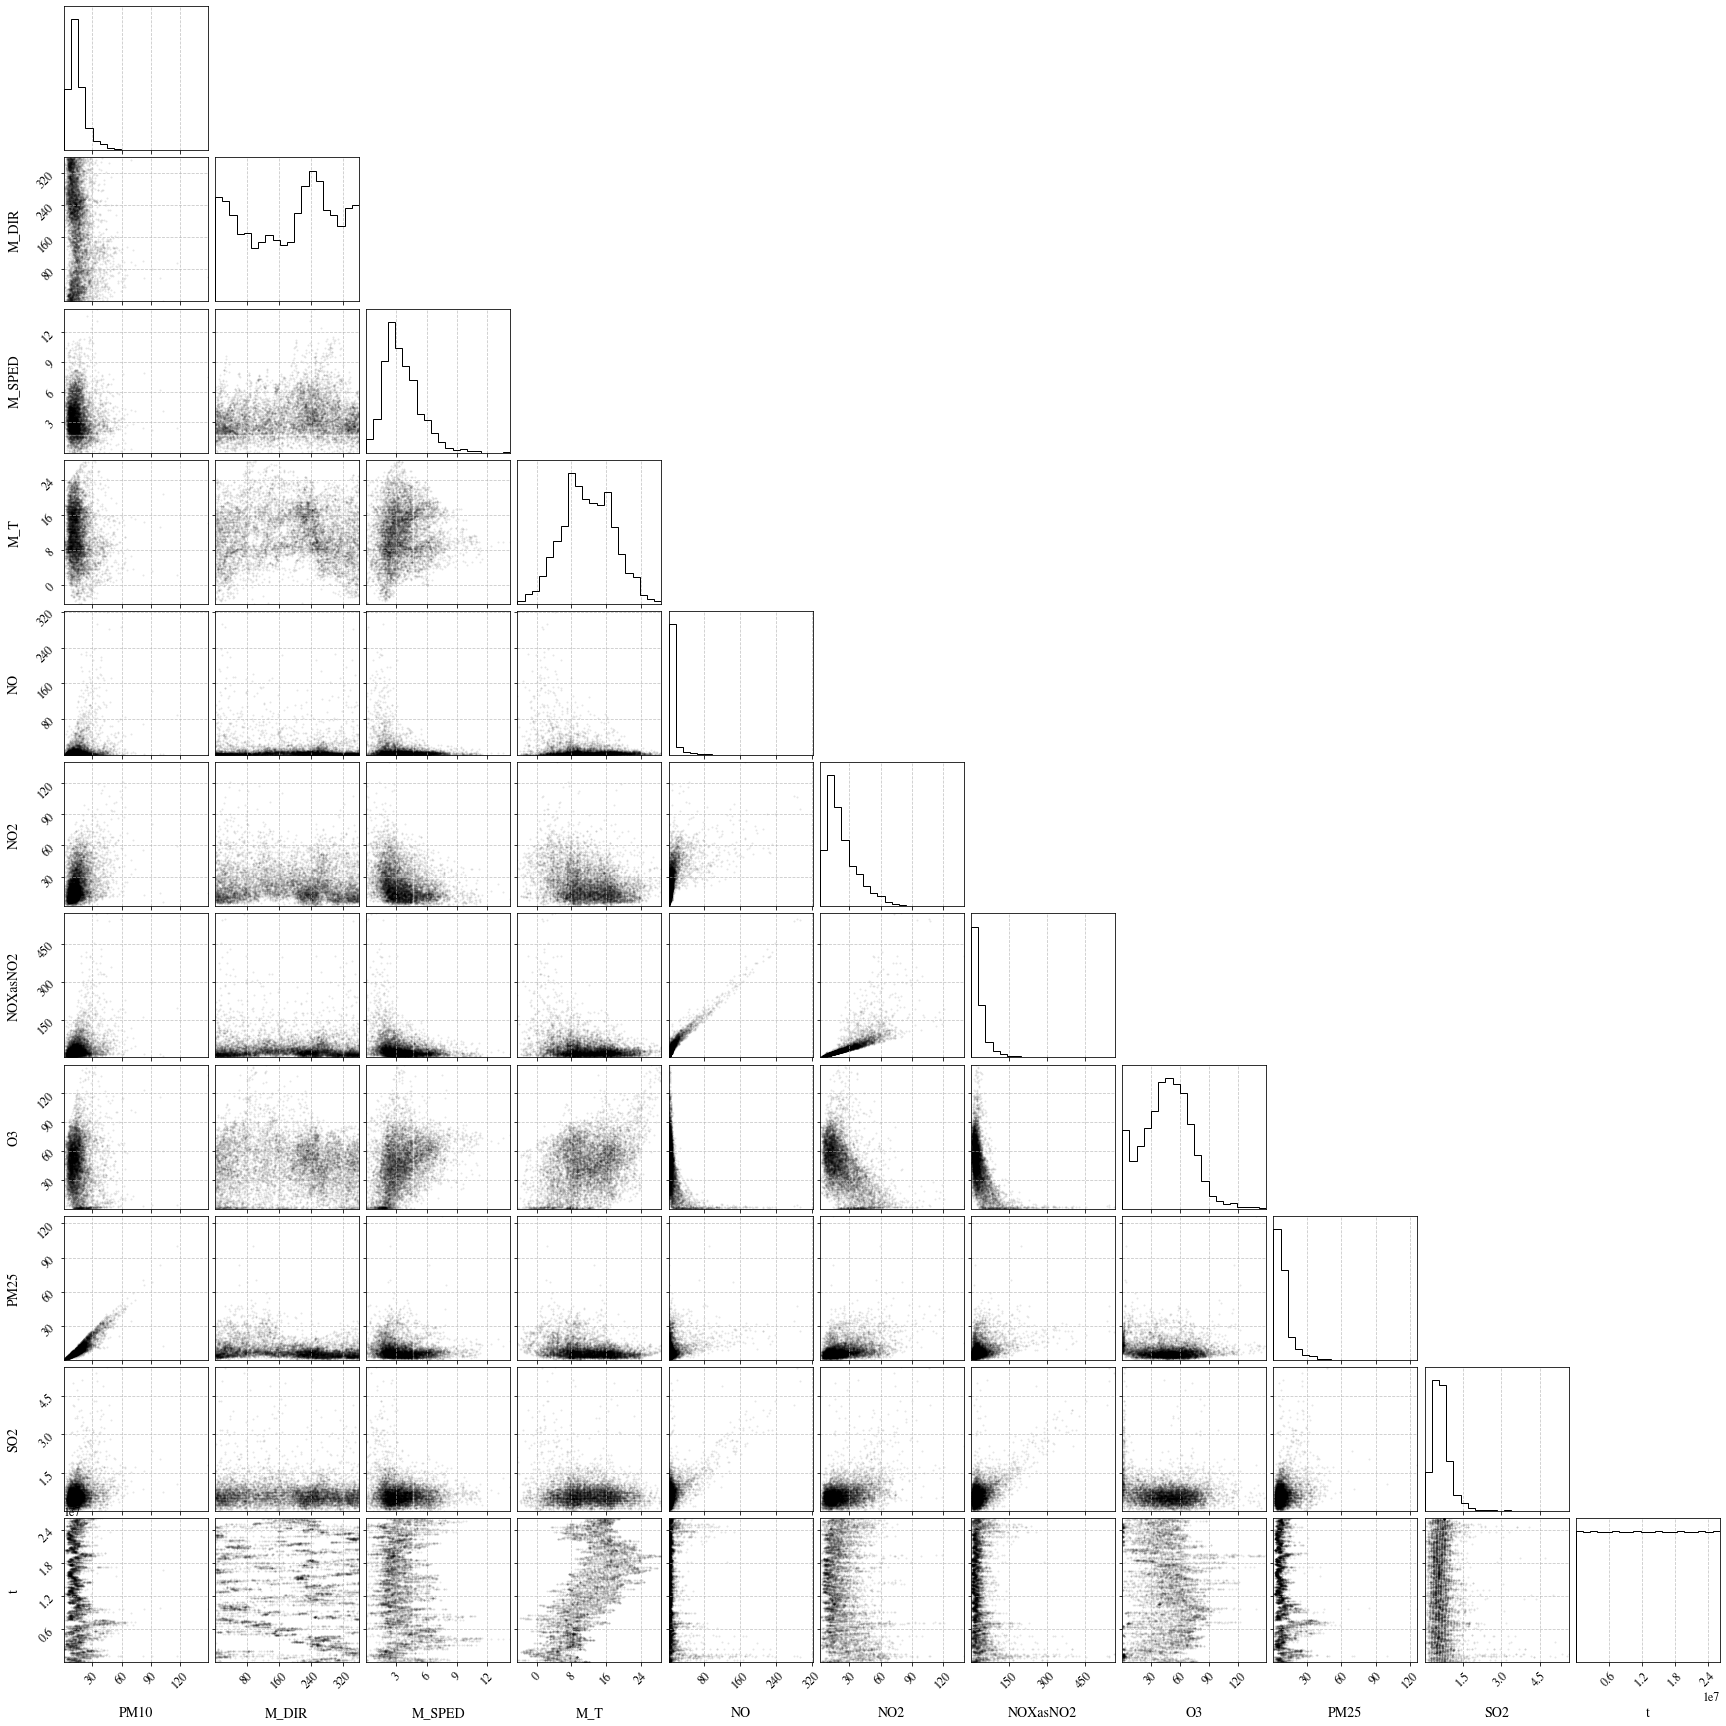

In [67]:
df_numeric = df2.select_dtypes(include='number')
#df_numeric = df_numeric.fillna(0)
#df_numeric = df_numeric.dropna()
df_numeric = df_numeric.interpolate()
corner.corner(df_numeric, facecolor='white', labels=df_numeric.columns, plot_contours=False, plot_density=False)
plt.show()

/tmp/ipykernel_1048/3030671753.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


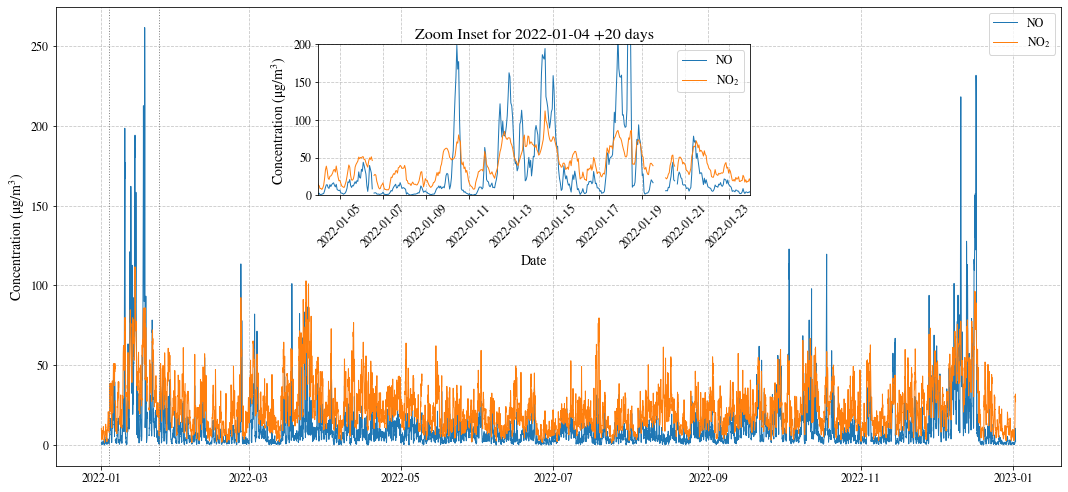

In [68]:
plt.figure(figsize=(15, 7))
plt.plot(df["DateTime"], df['NO'], label='NO')
plt.plot(df["DateTime"], df['NO2'], label='NO$_2$')
plt.ylabel(r'Concentration ($\mathrm{\mu g/m^3}$)')
plt.legend()

zoom_date = pd.to_datetime("2022-01-04")
days_offset = 20

plt.axvline(zoom_date, color='gray', linestyle='dotted', label='Zoom Start')
plt.axvline(zoom_date+ pd.Timedelta(days=days_offset), color='gray', linestyle='dotted', label='Zoom Start')

# Inset figure
plt.axes([0.3, 0.6, 0.4, 0.3])  # [left, bottom, width, height]
plt.plot(df["DateTime"], df['NO'], label='NO')
plt.plot(df["DateTime"], df['NO2'], label='NO$_2$')
plt.xlim(zoom_date, zoom_date + pd.Timedelta(days=days_offset))
plt.ylim(0, 200)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel(r'Concentration ($\mathrm{\mu g/m^3}$)')
plt.title(f'Zoom Inset for {zoom_date.date()} +{days_offset} days')
plt.legend()

plt.tight_layout()
plt.show()